# Housing Price Regression  

- Dta cleaning and feature exploration
- Exploratory data analysis with Visualization
- Creating a pipeline for tain and test sets
- Model Experimentation and parameter tuning (Linear Regression, Random Forest, XGBoost)
- Feature Engineering 
- Ensembling 


In [2]:
#import relevant packages 
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns


# Basic Data Exploration
- Import the data
- Look at summary statisitcs 
- Check Null Values

In [3]:
#import data 
df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")


In [4]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [4]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- This dataset comprises 81 features, including both numerical (int64, float64) and categorical (object) types.
- As we progress with data processing, we will assess the necessity of conducting PCA analysis to eliminate less significant features.
- Based on the column descriptions, it is evident that this dataset exhibits multicollinearity issues. Therefore, we should either avoid using linear regression models or address the multicollinearity before applying such models.

In [5]:
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical ))


,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [41]:
# Calculate null values and their percentage
null_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

null_summary = pd.DataFrame({'Null Values': null_values, 'Percentage': missing_percentage, 'DataType': df.dtypes})

html_null_summary = create_scrollable_table(null_summary, 'null_summary', 'Null Value Info')

display(HTML(html_null_summary))


,Null Values,Percentage,DataType
Id,0,0.000000,int64
MSSubClass,0,0.000000,int64
MSZoning,0,0.000000,object
LotFrontage,259,17.739726,float64
LotArea,0,0.000000,int64
Street,0,0.000000,object
Alley,1369,93.767123,object
LotShape,0,0.000000,object
LandContour,0,0.000000,object
Utilities,0,0.000000,object


In [12]:
df[df['GarageFinish'] == 'NA']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


The null value can be a type of NA, for xample, in Alley features, null value can be no alley access, the fence feature null value can be type of no fence (NA), as the data processing we will see should we encode these null value.

In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Explore the dependent variable 

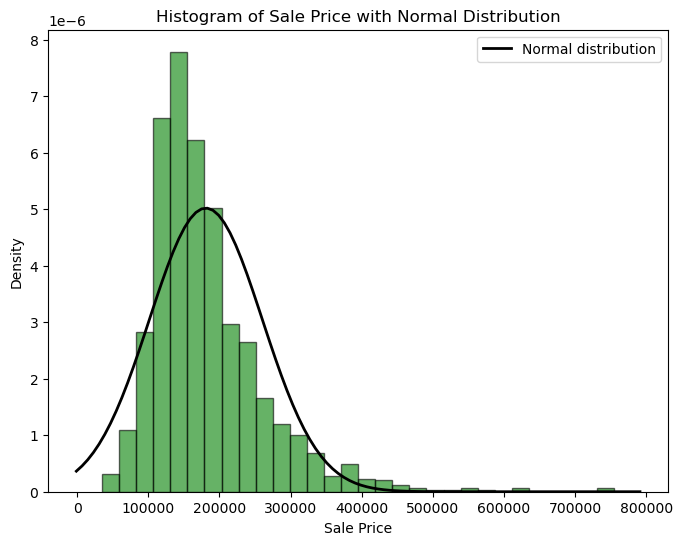

In [23]:
from scipy.stats import norm

sale_price = df['SalePrice']

mu, std = sale_price.mean(), sale_price.std()

plt.figure(figsize=(8, 6))
plt.hist(sale_price, bins=30, density=True, alpha=0.6, color='g', edgecolor='k')

# Add a normal distribution line
xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label='Normal distribution')
# title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title('Histogram of Sale Price with Normal Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.legend()
# plt.grid(True)
plt.show()

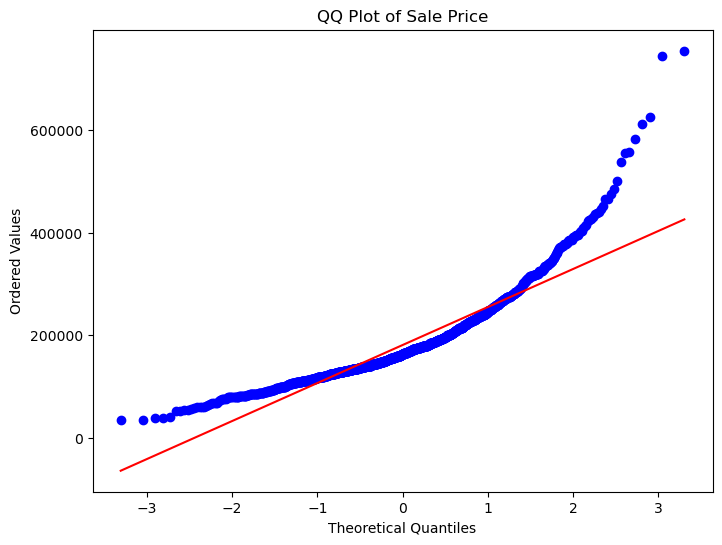

In [25]:
plt.figure(figsize=(8, 6))
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title('QQ Plot of Sale Price')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
# plt.grid(True)
plt.show()

From the histogram and QQplot, we can see that the sales price has a bit skewness and heavier tails.

# What questions do we want to ask of the data?

1. Distribution of dwelling types and their relation to sale prices?
2. Does zoning impact sale price?
3. Does street and alley access types effect on sale price?
4. What is the Average sale price by property shape?
5. Is there a Correlation between Property Age and Sale Price
6. Is there a Correlation between Living Area and Sale Price
7. Does price change year to year?

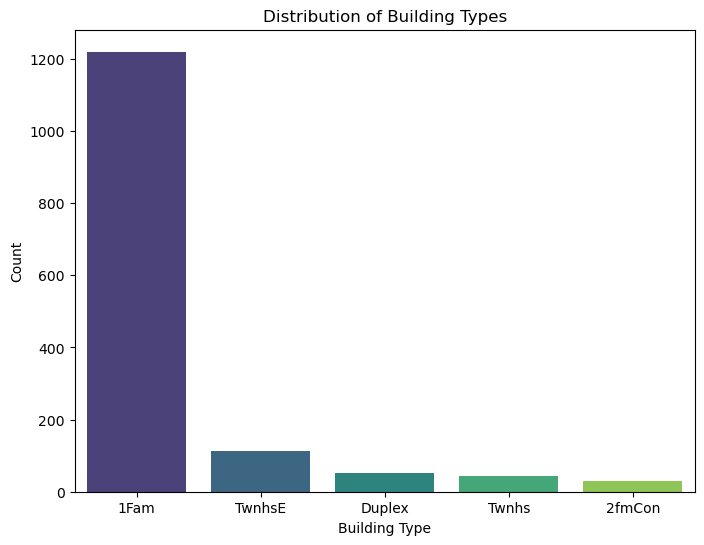

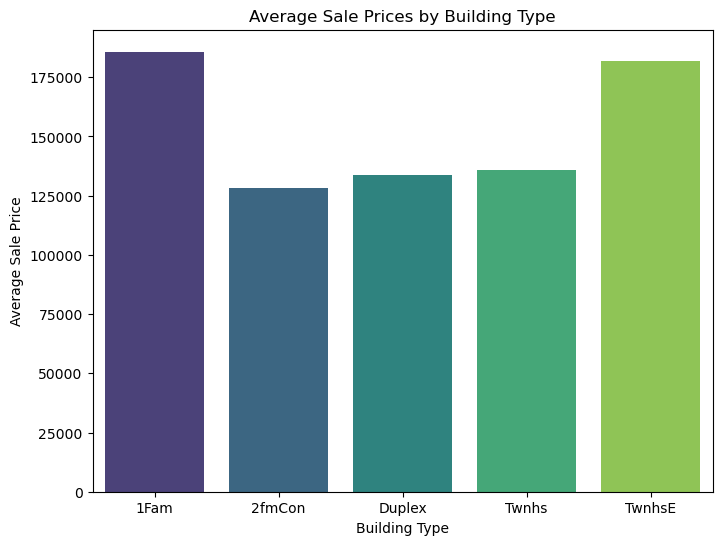

In [10]:
dwelling_types = df['BldgType'].value_counts()
dwelling_prices = df.groupby('BldgType')['SalePrice'].mean()
formatted_dwelling_prices = ['$' + f'{value:,.2f}' for value in dwelling_prices.values]

plt.figure(figsize=(8,6))
sns.barplot(x=dwelling_types.index, y=dwelling_types.values, palette='viridis')
plt.title('Distribution of Building Types')
plt.xlabel('Building Type')
plt.ylabel('Count')
# plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x=dwelling_prices.index, y=dwelling_prices.values, palette='viridis')
plt.title('Average Sale Prices by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Average Sale Price')
# plt.xticks(rotation=45)
plt.show()

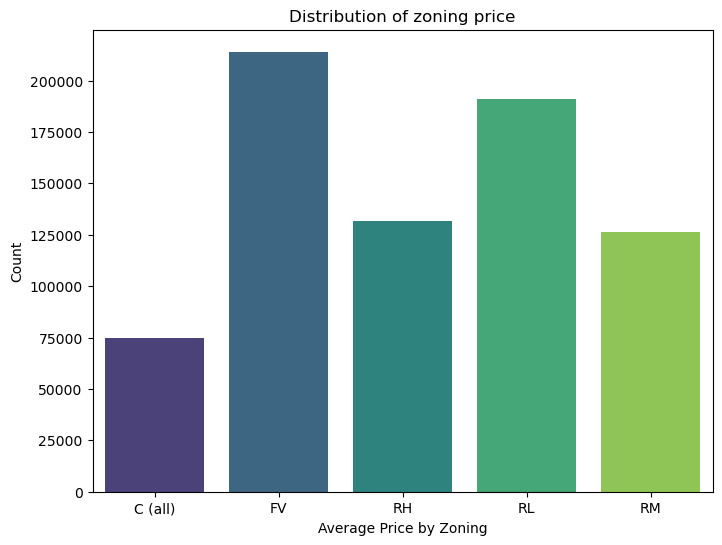

In [12]:
# 2. Zoning impact on sale price
zoning_prices = df.groupby('MSZoning')['SalePrice'].mean()

plt.figure(figsize=(8,6))
sns.barplot(x=zoning_prices.index, y=zoning_prices.values, palette='viridis')
plt.title('Distribution of zoning price')
plt.xlabel('Average Price by Zoning')
plt.ylabel('Count')
plt.show()


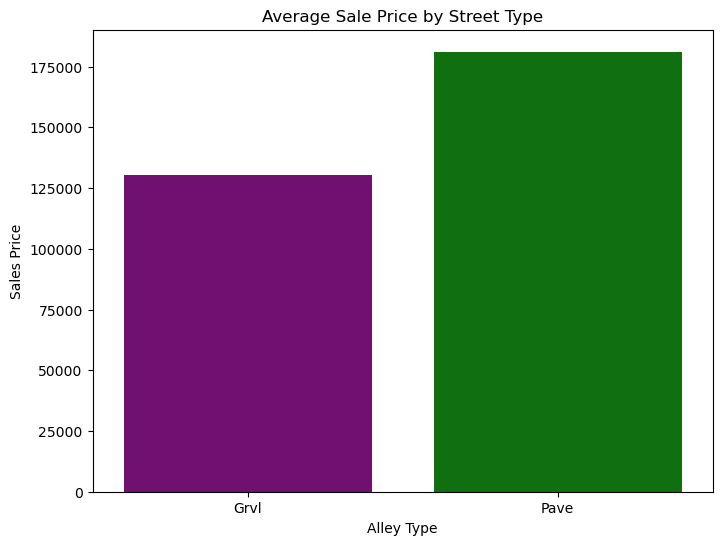

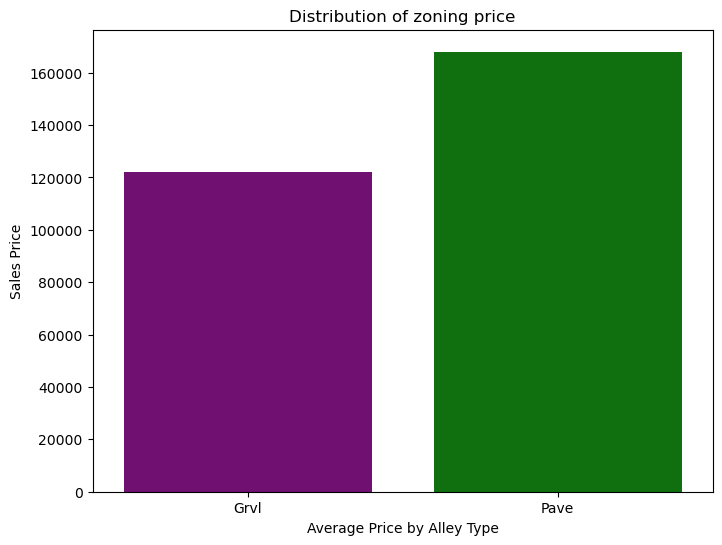

In [13]:
# 3. Street type impact on sale price

street_prices = df.groupby('Street')['SalePrice'].mean()
alley_prices = df.groupby('Alley')['SalePrice'].mean()


plt.figure(figsize=(8,6))
sns.barplot(x=street_prices.index, y=street_prices.values, palette=['purple', 'green'])
plt.title('Average Sale Price by Street Type')
plt.xlabel('Alley Type')
plt.ylabel('Sales Price')
plt.show()


plt.figure(figsize=(8,6))
sns.barplot(x=alley_prices.index, y=alley_prices.values, palette=['purple', 'green'])
plt.title('Distribution of zoning price')
plt.xlabel('Average Price by Alley Type')
plt.ylabel('Sales Price')
plt.show()


Reg: Regular
IR1: Slightly irregular
IR2: Moderately irregular
IR3: Irregular

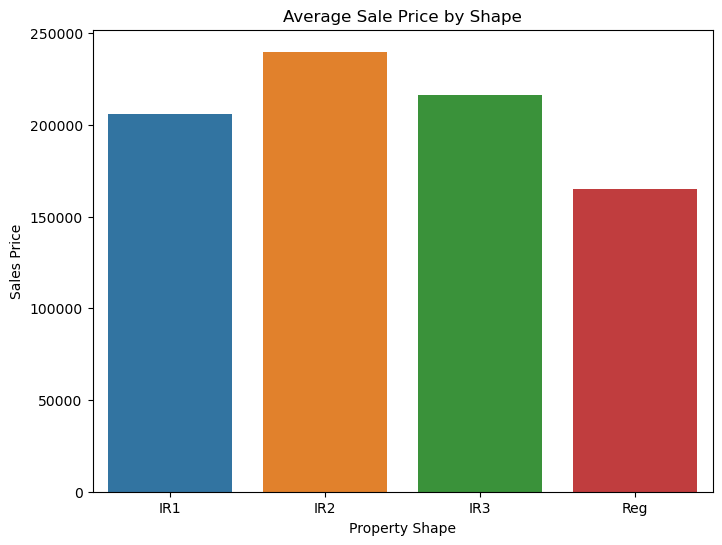

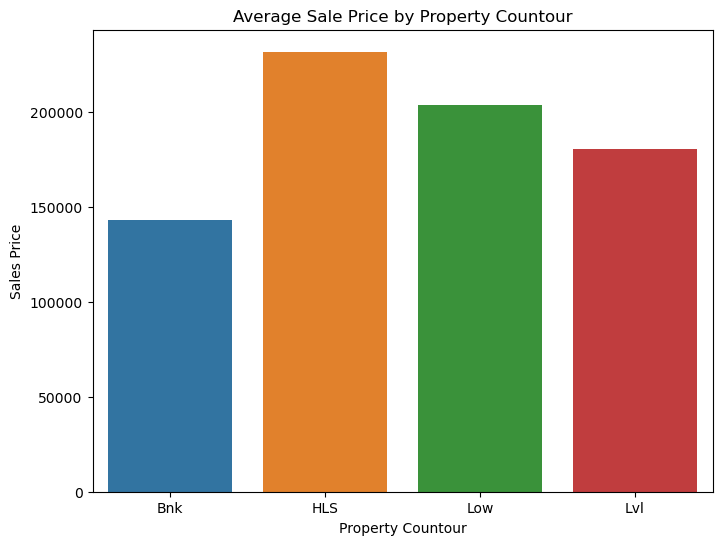

In [14]:
# 4. Average sale price by property shape

shape_prices = df.groupby('LotShape')['SalePrice'].mean()
contour_prices = df.groupby('LandContour')['SalePrice'].mean()


plt.figure(figsize=(8,6))
sns.barplot(x=shape_prices.index, y=shape_prices.values)
plt.title('Average Sale Price by Shape')
plt.xlabel('Property Shape')
plt.ylabel('Sales Price')
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x=contour_prices.index, y=contour_prices.values)
plt.title('Average Sale Price by Property Countour')
plt.xlabel('Property Countour')
plt.ylabel('Sales Price')
plt.show()

Correlation between Property Age and Sale Price: -0.523350417546816


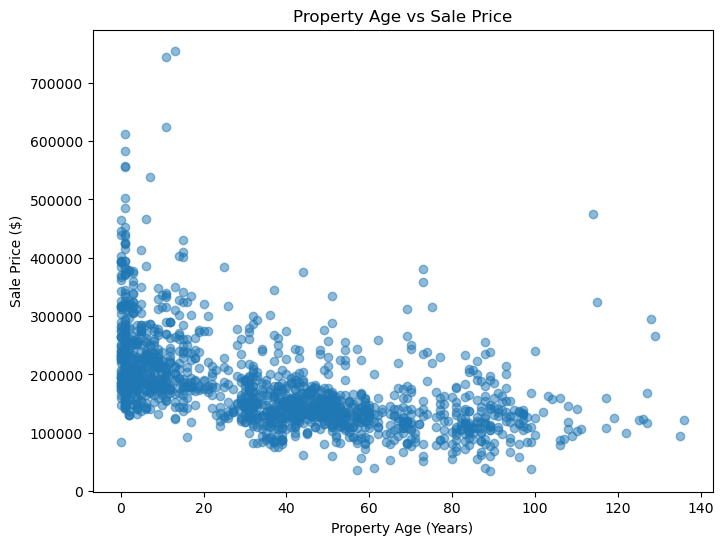

In [16]:
# 5. Property Age impact on sale price
df['PropertyAge'] = df['YrSold'] - df['YearBuilt']

# Calculate Correlation between Property Age and Sale Price
age_price_corr = df['PropertyAge'].corr(df['SalePrice'])
print(f'Correlation between Property Age and Sale Price: {age_price_corr}')

# Create a scatter plot to visualize the relationship between Property Age and Sale Price
plt.figure(figsize=(8, 6)) 
plt.scatter(df['PropertyAge'], df['SalePrice'], alpha=0.5)
plt.title('Property Age vs Sale Price')
plt.xlabel('Property Age (Years)') 
plt.ylabel('Sale Price ($)') 
plt.show()  

Correlation between Living Area (above grade) and Sale Price: 0.7086244776126523


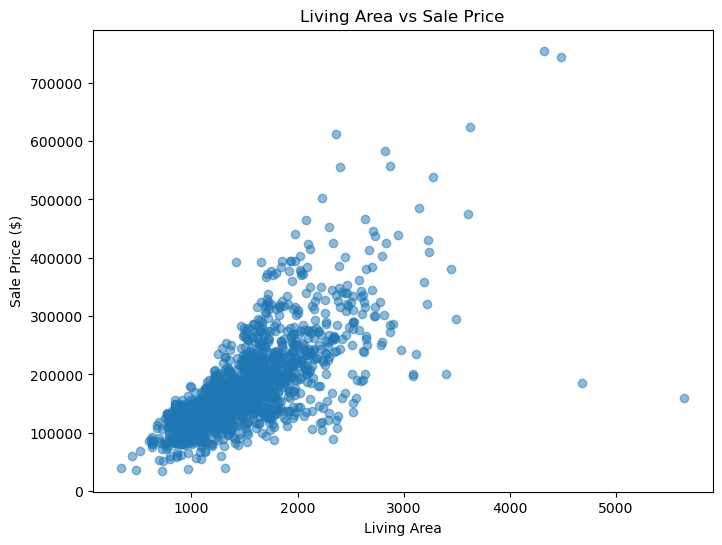

In [18]:
# 6. Calculate Correlation between Living Area and Sale Price
living_area_price_corr = df['GrLivArea'].corr(df['SalePrice'])
print(f'Correlation between Living Area (above grade) and Sale Price: {living_area_price_corr}')

# Create a scatter plot to visualize the relationship between Living Area and Sale Price
plt.figure(figsize=(8, 6)) 
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.5)
plt.title('Living Area vs Sale Price')
plt.xlabel('Living Area') 
plt.ylabel('Sale Price ($)') 
plt.show()  

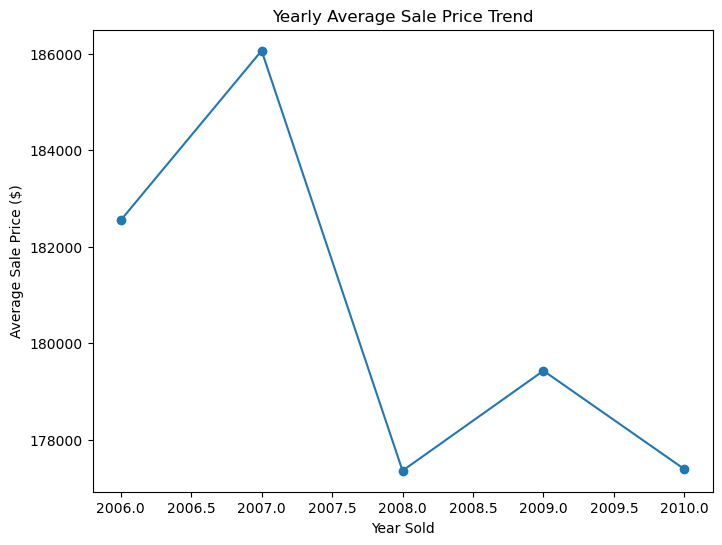

In [21]:
# 7. Box plot of price over the years
yearly_avg_sale_price = df.groupby('YrSold')['SalePrice'].mean()

plt.figure(figsize=(8, 6))
plt.plot(yearly_avg_sale_price.index, yearly_avg_sale_price.values, marker='o', linestyle='-') 
plt.title('Yearly Average Sale Price Trend')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price ($)')
plt.show()

# Feature Engineering
- Encoded categorical features and creating new valuable features

# Creating a Data Pipeline
- Set up a preprocessing pipeline that applies suitable transformations to each type of feature (numerical or categorical)

# Principal Component Analysis 
- apply Pricipal Compnent Analysis to select important featrues with over 95% information.

In [7]:
# Assuming 'df' is your DataFrame and it contains categorical columns where 'NA' should be interpreted as 'No'
categorical_columns = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']  # List your categorical columns

for col in categorical_columns:
    df[col] = df[col].replace({'NAN': 'No'})


In [8]:
from sklearn.preprocessing import FunctionTransformer

# feature engineering functions 
def custom_features(df):
    df_out = df.copy()
    df_out['PropertyAge'] = df_out['YrSold'] - df_out['YearBuilt']
    df_out['TotalSF'] = df_out['TotalBsmtSF'] + df_out['1stFlrSF'] + df_out['2ndFlrSF']
    df_out['TotalBath'] = df_out['FullBath'] + 0.5 * df_out['HalfBath'] + df_out['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    df_out['HasRemodeled'] = (df_out['YearRemodAdd'] != df_out['YearBuilt']).astype(object)
    df_out['Has2ndFloor'] = (df_out['2ndFlrSF'] > 0).astype(object)
    df_out['HasGarage'] = (df_out['GarageArea'] > 0).astype(object)
    df_out['YrSold_cat'] = df_out['YrSold'].astype(object)
    df_out['MoSold_cat'] = df_out['MoSold'].astype(object)
    df_out['YearBuilt_cat'] = df_out['YearBuilt'].astype(object)
    df_out['MSSubClass_cat'] = df_out['MSSubClass'].astype(object)
    
    return df_out

feature_engineering_transformer = FunctionTransformer(custom_features)

In [16]:
# Identify categorical and numerical columns
new_cols_categorical = pd.Index(['HasRemodeled', 'Has2ndFloor', 'HasGarage'])
new_cols_numeric = pd.Index(['PropertyAge', 'TotalSF', 'TotalBath', 'YrSold_cat', 'MoSold_cat', 'YearBuilt_cat', 'MSSubClass_cat'])

# Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.append(new_cols_categorical)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.append(new_cols_numeric)

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('fe', feature_engineering_transformer),
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95))])  # Automatically select the number of components for 95% variance

# Apply the pipeline to your dataset
X = df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice'])
X_preprocessed = pipeline.fit_transform(X)

In [18]:
n_components = pipeline.named_steps['pca'].n_components_
print(f'Number of components selected by PCA: {n_components}')

Number of components selected by PCA: 76


# Built different models with preprocessed data

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids = {}
for model_name, model in models.items():
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.165890151465744

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE for RandomForest: 0.14824103070774255

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE for XGBoost: 0.13380268469849219



In [20]:
# Models on test split score
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids[i].predict(X_test), y_test))))

LinearRegression: 0.14351954625909008
RandomForest: 0.14388538196463682
XGBoost: 0.1340546476521455


In [ ]:
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')